In [6]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
train_df = pd.read_csv("./mnist_data/mnist_train.csv")
test_df = pd.read_csv("./mnist_data/mnist_test.csv")

In [8]:
x_train = train_df.drop('label', axis=1)
y_train = train_df['label']
x_train = torch.tensor(x_train.values, dtype=torch.float)
y_train = torch.tensor(y_train.values, dtype=torch.long)

x_test = test_df.drop('label', axis=1)
y_test = test_df['label']
x_test = torch.tensor(x_test.values, dtype=torch.float)
y_test = torch.tensor(y_test.values, dtype=torch.long)

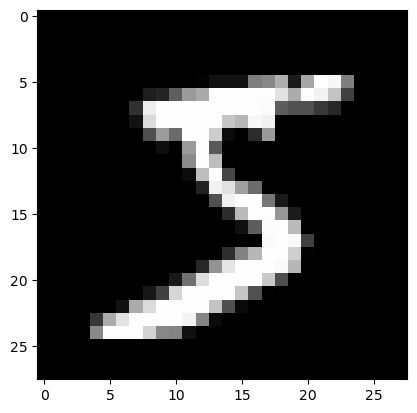

In [10]:
plt.imshow(x_test[0].reshape(28,28), cmap='gray')

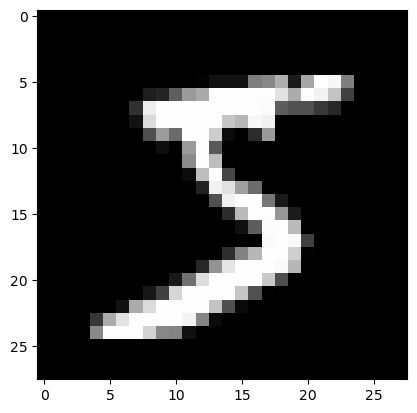

In [11]:

plt.imshow(x_train[0].reshape(28,28), cmap='gray')

In [151]:
from torch.nn import functional as F

In [152]:
class My_Minist_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden_layer = nn.Linear(28*28, 128)
        self.hidden_layer2 = nn.Linear(128,256)
        self.out = nn.Linear(256, 10)
    
    def forward(self, x):
        x = F.relu(self.hidden_layer(x))
        x = F.relu(self.hidden_layer2(x))
        x = self.out(x)
        return x

In [153]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [154]:
model = My_Minist_NN().to(device)

In [155]:
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

In [156]:
# 简化数据集
train_set = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_set, batch_size=64, shuffle=True)

test_set = TensorDataset(x_test, y_test)
test_dl = DataLoader(test_set, batch_size=64)

In [157]:
# def get_data(trainset, testset,batch_size):
#     return (
#         DataLoader(trainset, batch_size=batch_size, shuffle=True),
#         DataLoader(testset, batch_size=batch_size),
#     )

In [158]:
def loss_batch(model, loss_func, x_batch, y_batch, optimizer=None):
    loss = loss_func(model(x_batch), y_batch)
    if optimizer is not None:
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    return loss.item(), len(x_batch)
    

In [159]:
def fit(model, loss_func, optimizer, train_dl, test_dl, epochs):
    for epoch in range(epochs):
        print(f'第{epoch+1}轮训练开始，请等待...')
        model.train()
        loss_val = 0
        total_batch_size = 0
        for x_batch, y_batch in train_dl:
            x_batch,y_batch = x_batch.to(device), y_batch.to(device)
            batch_loss,batch_size = loss_batch(model, loss_func, x_batch, y_batch, optimizer)
            # print(f'当前损失----{batch_loss}')
            loss_val += batch_loss*batch_size
            total_batch_size += batch_size
        avg_loss = loss_val/total_batch_size
        print(f'--本轮平均Loss: {avg_loss:.4f}')
    print("训练完成")
    torch.save(model.state_dict(), "./mnist_model.pt")

In [160]:
# input_dl,testput_dl =  get_data(train_set, test_set, 100)
# print(input_dl)
loss_func = F.cross_entropy
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [161]:
fit(model,loss_func,optimizer,train_dl,test_dl,epochs=15)

第1轮训练开始，请等待...
--已取出60000个样本
--本轮平均Loss: 0.4407
第2轮训练开始，请等待...
--已取出60000个样本
--本轮平均Loss: 0.1841
第3轮训练开始，请等待...
--已取出60000个样本
--本轮平均Loss: 0.1332
第4轮训练开始，请等待...
--已取出60000个样本
--本轮平均Loss: 0.1044
第5轮训练开始，请等待...
--已取出60000个样本
--本轮平均Loss: 0.0860
第6轮训练开始，请等待...
--已取出60000个样本
--本轮平均Loss: 0.0711
第7轮训练开始，请等待...
--已取出60000个样本
--本轮平均Loss: 0.0605
第8轮训练开始，请等待...
--已取出60000个样本
--本轮平均Loss: 0.0521
第9轮训练开始，请等待...
--已取出60000个样本
--本轮平均Loss: 0.0448
第10轮训练开始，请等待...
--已取出60000个样本
--本轮平均Loss: 0.0391
第11轮训练开始，请等待...
--已取出60000个样本
--本轮平均Loss: 0.0343
第12轮训练开始，请等待...
--已取出60000个样本
--本轮平均Loss: 0.0298
第13轮训练开始，请等待...
--已取出60000个样本
--本轮平均Loss: 0.0260
第14轮训练开始，请等待...
--已取出60000个样本
--本轮平均Loss: 0.0232
第15轮训练开始，请等待...
--已取出60000个样本
--本轮平均Loss: 0.0204
训练完成


In [182]:
def evaluate(model, test_dl):
    model.eval()  # 设置模型为评估模式
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():  # 关闭自动求导
        for x_batch, y_batch in test_dl:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            outputs = model(x_batch)
            _, predicted = torch.max(outputs, 1) #每一行中取最大值
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    accuracy = correct / total
    print(f'测试集上的准确率: {accuracy * 100:.2f}%')
    return all_preds, all_labels

In [183]:
print(y_test[:10])

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])


In [181]:
evaluate(model,test_dl)

测试集上的准确率: 96.79%


([7,
  2,
  1,
  0,
  4,
  1,
  4,
  9,
  5,
  9,
  0,
  6,
  9,
  0,
  1,
  5,
  9,
  7,
  3,
  4,
  9,
  6,
  6,
  5,
  4,
  0,
  7,
  4,
  0,
  1,
  3,
  1,
  3,
  4,
  7,
  2,
  7,
  1,
  2,
  1,
  1,
  7,
  4,
  2,
  3,
  5,
  1,
  2,
  4,
  4,
  6,
  3,
  5,
  5,
  6,
  0,
  4,
  1,
  9,
  5,
  7,
  8,
  9,
  3,
  7,
  4,
  6,
  4,
  3,
  0,
  7,
  0,
  2,
  9,
  1,
  7,
  3,
  2,
  9,
  7,
  7,
  6,
  2,
  7,
  8,
  4,
  7,
  3,
  6,
  1,
  3,
  6,
  9,
  3,
  1,
  4,
  1,
  7,
  6,
  9,
  6,
  0,
  5,
  4,
  9,
  9,
  2,
  1,
  9,
  4,
  8,
  7,
  3,
  9,
  7,
  4,
  4,
  4,
  9,
  2,
  5,
  4,
  7,
  6,
  7,
  9,
  0,
  5,
  8,
  5,
  6,
  6,
  5,
  7,
  8,
  1,
  0,
  1,
  6,
  4,
  6,
  7,
  3,
  1,
  7,
  1,
  8,
  2,
  0,
  2,
  9,
  9,
  5,
  5,
  1,
  5,
  6,
  0,
  3,
  4,
  4,
  6,
  5,
  4,
  6,
  5,
  4,
  5,
  1,
  4,
  4,
  7,
  2,
  3,
  2,
  7,
  1,
  8,
  1,
  8,
  1,
  8,
  5,
  0,
  8,
  9,
  2,
  5,
  0,
  1,
  1,
  1,
  0,
  3,
  0,
  3,
  1,
  6,
  4,
  2,
